In [1]:
import pandas as pd
import numpy as np
from utils import config_paths, find_non_numeric_cols, find_null_cols, find_null_cols_pct, classify_null_cols, drop_null_cols, impute_missing_values_numeric, impute_missing_values_ordinal, encode_nominal_features, imput_missing_values_nominal
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# display max columns to see all columns
pd.set_option("display.max_columns", None)

In [3]:
proj_root = config_paths["proj_root"]
data_dir = config_paths["data_dir"]
bronze_dir = config_paths["bronze_dir"]

In [4]:
df_train = pd.read_csv(f"{bronze_dir}/codetest_train.txt", sep="\t")
df_test = pd.read_csv(f"{bronze_dir}/codetest_test.txt", sep="\t")

In [5]:
df_train

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,-0.129,-0.268,0.367,-0.033,2.359,-0.469,-0.214,0.896,1.245,1.852,1.438,0.454,0.051,-0.076,0.308,-1.439,0.560,0.167,-0.719,0.475,-1.586,-2.020,-0.497,-0.946,2.394,1.181,0.463,1.789,-0.173,0.545,0.228,-1.132,-0.421,1.456,-0.727,0.189,1.809,-0.180,-0.245,0.144,-1.125,-0.587,0.669,-0.976,-0.361,0.702,0.535,-0.189,0.438,-0.907,NaN,1.330,b,-0.037,-0.100,0.983,0.634,-0.914,-1.627,0.791,-1.158,0.221,0.493,-1.055,-0.491,0.172,0.098,-1.135,-0.941,0.368,-0.006,-0.919,-0.978,-0.468,0.248,-0.659,-1.612,-1.857,0.996,-0.323,1.296,0.982,0.459,-0.759,-0.116,0.734,-2.218,-1.701,0.247,0.890,0.089,1.709,0.115,0.996,0.770,0.182,-1.061,-0.966,0.596,NaN,1.645,2.074,-0.517,0.667,-1.007,-0.588,0.836,NaN,0.183,-0.202,0.409,1.171,D,1.019,-0.522,0.286,-0.431,0.730,0.861,1.834,-2.278,-0.626,NaN,-0.050,-1.372,-1.134,0.778,1.915,0.197,0.564,-0.518,-0.057,1.204,-1.306,-0.302,0.440,-0.572,-0.818,-0.731,-2.168,NaN,-0.895,0.428,-0.981,0.361,0.777,0.800,-2.109,-1.287,0.780,1.422,0.170,-0.371,-2.303,0.362,0.521,-0.761,1.642,-1.261,1.424,0.866,0.341,-0.877,NaN,-1.393,0.366,0.639,-1.657,0.468,0.120,0.228,1.920,-1.542,-0.178,0.748,0.243,0.988,-0.030,1.047,-1.062,0.585,-2.081,-1.119,-1.095,1.619,1.262,0.539,-0.782,-2.092,-1.359,-1.226,1.587,1.993,-0.028,-2.500,-2.004,-0.789,-0.171,-0.061,-0.164,1.681,0.478,1.421,-0.470,0.202,NaN,red,1.190,0.211,-0.081,0.256,-0.644,0.868,0.604,0.212,0.460,-0.942,0.525,0.836,0.973,-0.050,NaN,0.620,-0.781,-0.909,0.943,1.153,1.331,Canada,0.793,NaN,0.261,0.664,0.585,-0.384,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,-1.019,0.121,0.782,-0.323,-1.156,-1.198,1.091,-0.037,-1.550,-0.638,-1.080,-1.061,-0.804,0.001,NaN,-0.505,1.151,-0.155,1.482,-1.647,-0.776,1.337,0.237,-1.017,-0.688,2.026,0.670,-1.772,NaN,-1.542,-2.249,-0.086,-0.510,1.531,0.051,-0.002,-0.441,-0.378,0.901,0.267,0.193,0.327,0.391,-0.789,-0.230,0.235,2.268,0.044,0.769,-0.488,-1.586,0.566,a,-0.838,0.450,1.992,-1.696,2.276,0.234,1.058,1.169,0.080,0.265,0.841,-1.232,-1.675,0.423,-0.575,0.913,1.630,1.521,-0.346,-1.154,-1.340,0.788,0.697,-0.023,2.952,1.081,0.506,-0.421,-0.066,-0.984,0.945,1.600,-0.445,0.569,0.813,0.958,-0.742,0.331,0.881,-1.144,-0.036,-2.327,1.885,-0.955,-0.026,1.781,-0.312,-0.407,0.097,-1.521,-1.841,-0.435,1.250,0.340,-1.664,0.048,-0.309,1.472,1.385,A,-0.941,-0.692,-0.117,1.178,-0.988,-0.703,0.604,1.217,-0.712,0.601,0.364,-0.967,1.510,-1.512,0.088,-0.368,-1.181,-1.805,-1.596,-0.745,-0.934,0.779,0.532,1.812,-1.5

In [6]:
df_train.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,4911.000000,4896.000000,4898.000000,4903.000000,4907.000000,4919.000000,4878.000000,4903.000000,4906.000000,4906.000000,4887.000000,4905.000000,4895.000000,4891.000000,4893.000000,4917.000000,4916.000000,4914.000000,4892.000000,4898.000000,4909.000000,4903.000000,4906.000000,4897.000000,4893.000000,4892.000000,4889.000000,4906.000000,4903.000000,4908.000000,4899.000000,4896.000000,4898.000000,4913.000000,4899.000000,4895.000000,4900.000000,4900.000000,4898.000000,4928.000000,4896.000000,4898.000000,4916.000000,4899.000000,4898.000000,4901.000000,4882.000000,4896.000000,4903.000000,4916.000000,4882.000000,4906.000000,4902.000000,4912.000000,4900.000000,4909.000000,4895.000000,4906.000000,4917.000000,4908.000000,4909.000000,4868.000000,4891.000000,4897.000000,4899.000000,4890.000000,4902.000000,4906.000000,4889.000000,4888.000000,4918.000000,4892.000000,4911.000000,4904.000000,4885.000000,4882.000000,4892.000000,4913.000000,4919.000000,4913.000000,4915.000000,4909.000000,4908.000000,4907.000000,4899.000000,4896.000000,4912.000000,4914.000000,4888.000000,4913.000000,4887.000000,4890.000000,4904.000000,4894.000000,4896.000000,4901.000000,4896.000000,4903.000000,4887.000000,4897.000000,4884.000000,4901.000000,4890.000000,4919.000000,4896.000000,4899.000000,4907.000000,4904.000000,4905.000000,4899.000000,4918.000000,4914.000000,4896.000000,4901.000000,4883.000000,4886.000000,4903.000000,4906.000000,4897.000000,4914.000000,4892.000000,4889.000000,4904.000000,4889.000000,4896.000000,4884.000000,4889.000000,4898.000000,4907.000000,4903.000000,4908.000000,4889.000000,4900.000000,4909.000000,4904.000000,4907.000000,4903.000000,4899.000000,4899.000000,4902.000000,4913.000000,4896.000000,4883.000000,4891.000000,4892.000000,4906.000000,4876.000000,4897.000000,4884.000000,4906.000000,4906.000000,4885.000000,4897.000000,4912.000000,4896.000000,4884.000000,4895.000000,4889.000000,4909.000000,4894.000000,4914.000000,4895.000000,4911.000000,4903.000000,4898.000000,4902.000000,4905.000000,4899.000000,4901.000000,4899.000000,4890.000000,4909.000000,4920.000000,4902.000000,4888.000000,4900.000000,4910.000000,4907.000000,4914.000000,4898.000000,4909.000000,4914.000000,4892.000000,4900.000000,4914.000000,4889.000000,4891.000000,4916.000000,4896.000000,4907.00000,4869.000000,4900.000000,4894.000000,4913.000000,4903.000000,4908.000000,4894.000000,4898.000000,4904.000000,4907.000000,4879.000000,4894.000000,4909.000000,4917.000000,4897.000000,4903.000000,4893

In [7]:
null_cols = find_null_cols(df_train)
null_cols_class = classify_null_cols(df=df_train, null_cols=null_cols)
null_cols_num = null_cols_class["numerical"]
null_cols_cat = null_cols_class["categorical"]

In [8]:
null_pct_df = find_null_cols_pct(df_train)
null_pct_df

,null_pct,null_count
target,0.0000,0
f_0,0.0194,97
f_1,0.0144,72
f_2,0.0184,92
f_3,0.0180,90
...,...,...
f_249,0.0228,114
f_250,0.0200,100
f_251,0.0158,79
f_252,0.0192,96


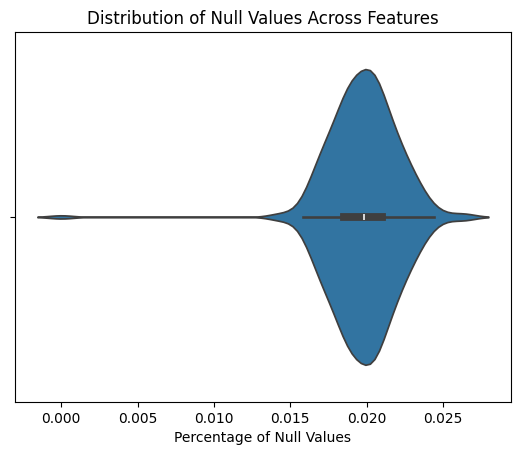

In [9]:
# Plot distribution of null values to explore range and concentration of missing data across all features
sns.violinplot(x=null_pct_df["null_pct"])
plt.xlabel("Percentage of Null Values")
plt.title("Distribution of Null Values Across Features")
plt.show()

#### Encoding Categorical variables

In [10]:
df_train_clean = drop_null_cols(df_train, null_cols_num)

In [11]:
df_train_clean.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,-0.129,-0.268,0.367,-0.033,2.359,-0.469,-0.214,0.896,1.245,1.852,1.438,0.454,0.051,-0.076,0.308,-1.439,0.560,0.167,-0.719,0.475,-1.586,-2.020,-0.497,-0.946,2.394,1.181,0.463,1.789,-0.173,0.545,0.228,-1.132,-0.421,1.456,-0.727,0.189,1.809,-0.180,-0.245,0.144,-1.125,-0.587,0.669,-0.976,-0.361,0.702,0.535,-0.189,0.438,-0.907,NaN,1.330,b,-0.037,-0.100,0.983,0.634,-0.914,-1.627,0.791,-1.158,0.221,0.493,-1.055,-0.491,0.172,0.098,-1.135,-0.941,0.368,-0.006,-0.919,-0.978,-0.468,0.248,-0.659,-1.612,-1.857,0.996,-0.323,1.296,0.982,0.459,-0.759,-0.116,0.734,-2.218,-1.701,0.247,0.890,0.089,1.709,0.115,0.996,0.770,0.182,-1.061,-0.966,0.596,NaN,1.645,2.074,-0.517,0.667,-1.007,-0.588,0.836,NaN,0.183,-0.202,0.409,1.171,D,1.019,-0.522,0.286,-0.431,0.730,0.861,1.834,-2.278,-0.626,NaN,-0.050,-1.372,-1.134,0.778,1.915,0.197,0.564,-0.518,-0.057,1.204,-1.306,-0.302,0.440,-0.572,-0.818,-0.731,-2.168,NaN,-0.895,0.428,-0.981,0.361,0.777,0.800,-2.109,-1.287,0.780,1.422,0.170,-0.371,-2.303,0.362,0.521,-0.761,1.642,-1.261,1.424,0.866,0.341,-0.877,NaN,-1.393,0.366,0.639,-1.657,0.468,0.120,0.228,1.920,-1.542,-0.178,0.748,0.243,0.988,-0.030,1.047,-1.062,0.585,-2.081,-1.119,-1.095,1.619,1.262,0.539,-0.782,-2.092,-1.359,-1.226,1.587,1.993,-0.028,-2.500,-2.004,-0.789,-0.171,-0.061,-0.164,1.681,0.478,1.421,-0.470,0.202,NaN,red,1.190,0.211,-0.081,0.256,-0.644,0.868,0.604,0.212,0.460,-0.942,0.525,0.836,0.973,-0.050,NaN,0.620,-0.781,-0.909,0.943,1.153,1.331,Canada,0.793,NaN,0.261,0.664,0.585,-0.384,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,-1.019,0.121,0.782,-0.323,-1.156,-1.198,1.091,-0.037,-1.550,-0.638,-1.080,-1.061,-0.804,0.001,NaN,-0.505,1.151,-0.155,1.482,-1.647,-0.776,1.337,0.237,-1.017,-0.688,2.026,0.670,-1.772,NaN,-1.542,-2.249,-0.086,-0.510,1.531,0.051,-0.002,-0.441,-0.378,0.901,0.267,0.193,0.327,0.391,-0.789,-0.230,0.235,2.268,0.044,0.769,-0.488,-1.586,0.566,a,-0.838,0.450,1.992,-1.696,2.276,0.234,1.058,1.169,0.080,0.265,0.841,-1.232,-1.675,0.423,-0.575,0.913,1.630,1.521,-0.346,-1.154,-1.340,0.788,0.697,-0.023,2.952,1.081,0.506,-0.421,-0.066,-0.984,0.945,1.600,-0.445,0.569,0.813,0.958,-0.742,0.331,0.881,-1.144,-0.036,-2.327,1.885,-0.955,-0.026,1.781,-0.312,-0.407,0.097,-1.521,-1.841,-0.435,1.250,0.340,-1.664,0.048,-0.309,1.472,1.385,A,-0.941,-0.692,-0.117,1.178,-0.988,-0.703,0.604,1.217,-0.712,0.601,0.364,-0.967,1.510,-1.512,0.088,-0.368,-1.181,-1.805,-1.596,-0.745,-0.934,0.779,0.532,1.812,-1.5

In [12]:
# Considering most values in feature variables are numeric we can check for non-numeric columns in the dataset
non_numeric_cols = find_non_numeric_cols(df_train_clean)
non_numeric_cols

['f_61', 'f_121', 'f_215', 'f_237']

In [13]:
# Seems non-numeric columns are categorical variables - explore value counts for each of them and verify if they are ordinal or nominal
for col in non_numeric_cols:
    print("-------------------")
    print(f"Value counts for categorical {col}")
    print(df_train_clean[col].value_counts())
    print("-------------------")

-------------------
Value counts for categorical f_61
f_61
d    1015
b     982
c     979
e     975
a     954
Name: count, dtype: int64
-------------------
-------------------
Value counts for categorical f_121
f_121
B    837
E    830
A    829
C    815
F    803
D    800
Name: count, dtype: int64
-------------------
-------------------
Value counts for categorical f_215
f_215
red       1294
yellow    1224
orange    1198
blue      1182
Name: count, dtype: int64
-------------------
-------------------
Value counts for categorical f_237
f_237
Canada    1677
USA       1650
Mexico    1578
Name: count, dtype: int64
-------------------


In [14]:
df_train_clean.loc[:, ["target", "f_61", "f_121", "f_215", "f_237"]]

,target,f_61,f_121,f_215,f_237
0,3.066056,b,D,red,Canada
1,-1.910473,a,A,blue,Canada
2,7.830711,b,B,orange,Canada
3,-2.180862,a,C,blue,USA
4,5.462784,b,E,orange,Canada
...,...,...,...,...,...
4995,-1.371557,e,B,blue,Canada
4996,-3.120233,c,F,red,Canada
4997,0.013335,d,F,yellow,Mexico
4998,4.289620,d,C,blue,USA


##### Ordinal Encoding

In [15]:
# Primary assumption is - f_61 and f_121 are ordinal categorical variables (this might need business input to confirm) - use ordinal encoding to convert them to numeric and preserve null values as a separate category (-1)
ordinal_features = ["f_61", "f_121"]
f_61_categories = ["a", "b", "c", "d", "e"]
f_121_categories = ["A", "B", "C", "D", "E", "F"]
ord_encoder = OrdinalEncoder(categories=[f_61_categories, f_121_categories], handle_unknown="use_encoded_value", unknown_value=-1)
df_train_clean.loc[:, ordinal_features] = ord_encoder.fit_transform(df_train_clean[ordinal_features])

for col in ordinal_features:
    df_train_clean[col] = pd.to_numeric(df_train_clean[col])

##### Nominal Encoding

In [16]:
# f_215 and f_237 are nominal categorical variables - use one-hot encoding to convert them to numeric and preserve null values as a separate binary category
one_hot_enc_features = ["f_215", "f_237"]

# Note: also preserve these two columns to later use for imputation of missing values
nominal_features_df = df_train_clean.loc[:, one_hot_enc_features].copy()

df_train_clean, encoded_cols = encode_nominal_features(df_train_clean, one_hot_enc_features)

#### Missing data imputation using Light Gradient Boosting Regressor and classifier

In [17]:
df_train_clean = impute_missing_values_numeric(df_train_clean, null_cols_num)

[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set: 4903, number of used features: 259
[LightGBM] [Info] Start training from score -0.000433
[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set: 4928, number of used features: 259
[LightGBM] [Info] Start training from score 0.002564
[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set: 4908, number of used features: 259
[LightGBM] [Info] Start training from score 0.028877
[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set: 4910, number of used features: 259
[LightGBM] [Info] Start training from score -0.005437
[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set: 4907, number of used features: 259
[LightGBM] [Info] Start training from score -0.006759
[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set:

In [18]:
null_cols_ord = ["f_61", "f_121"]
df_train_clean = impute_missing_values_ordinal(df_train_clean, null_cols_ord)

[LightGBM] [Info] Total Bins 64026
[LightGBM] [Info] Number of data points in the train set: 4905, number of used features: 259
[LightGBM] [Info] Start training from score -1.637347
[LightGBM] [Info] Start training from score -1.608419
[LightGBM] [Info] Start training from score -1.611479
[LightGBM] [Info] Start training from score -1.575366
[LightGBM] [Info] Start training from score -1.615573
[LightGBM] [Info] Total Bins 64024
[LightGBM] [Info] Number of data points in the train set: 4914, number of used features: 259
[LightGBM] [Info] Start training from score -1.779623
[LightGBM] [Info] Start training from score -1.770019
[LightGBM] [Info] Start training from score -1.796655
[LightGBM] [Info] Start training from score -1.815232
[LightGBM] [Info] Start training from score -1.778418
[LightGBM] [Info] Start training from score -1.811489


In [19]:
df_train_clean = imput_missing_values_nominal(df=df_train_clean, nominal_features_df=nominal_features_df, encoded_features=encoded_cols, null_cols=one_hot_enc_features)

[LightGBM] [Info] Total Bins 64022
[LightGBM] [Info] Number of data points in the train set: 4898, number of used features: 256
[LightGBM] [Info] Start training from score -1.421619
[LightGBM] [Info] Start training from score -1.408173
[LightGBM] [Info] Start training from score -1.331089
[LightGBM] [Info] Start training from score -1.386703
[LightGBM] [Info] Total Bins 64022
[LightGBM] [Info] Number of data points in the train set: 4905, number of used features: 256
[LightGBM] [Info] Start training from score -1.073249
[LightGBM] [Info] Start training from score -1.134097
[LightGBM] [Info] Start training from score -1.089480


In [20]:
df_train_clean

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_215_orange,f_215_red,f_215_yellow,f_237_Mexico,f_237_USA
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,0.028048,1.115,-0.171,-0.351,-0.129,-0.268,0.367,-0.033,2.359,-0.469,-0.214,0.896,1.245,1.852,1.438,0.454000,0.051,-0.076000,0.308000,-1.439,0.560,0.167,-0.719,0.475,-1.586,-2.020,-0.497,-0.946,2.394,1.181,0.463,1.789,-0.173000,0.545,0.228,-1.132,-0.421,1.456,-0.727,0.189,1.809,-0.180,-0.245,0.144,-1.125,-0.587,0.669,-0.976,-0.361,0.702,0.535,-0.189000,0.438000,-0.907,0.053264,1.330,1.0,-0.037,-0.100,0.983,0.634,-0.914,-1.627,0.791,-1.158,0.221,0.493,-1.055,-0.491,0.172,0.098000,-1.135,-0.941,0.368,-0.006,-0.919,-0.978,-0.468,0.248000,-0.659,-1.612,-1.857,0.996,-0.323,1.296,0.982,0.459,-0.759,-0.116,0.734,-2.218,-1.701,0.24700,0.890,0.089,1.709,0.115,0.996,0.770,0.182,-1.061,-0.966000,0.596000,0.45651,1.645,2.074,-0.517000,0.667000,-1.007,-0.588,0.836,-0.14664,0.183,-0.202,0.409,1.171,3.0,1.019,-0.522,0.286000,-0.431000,0.730,0.861,1.834,-2.278000,-0.626,-0.457813,-0.050,-1.372,-1.134,0.778,1.915,0.197,0.564,-0.518,-0.057000,1.204,-1.306,-0.302,0.440,-0.572,-0.818,-0.731,-2.168,0.52635,-0.895,0.428,-0.981,0.361,0.777000,0.800,-2.109000,-1.287,0.780,1.422,0.170,-0.371,-2.303,0.362000,0.521,-0.761,1.642,-1.261,1.424,0.866,0.341,-0.877,0.035693,-1.393,0.366000,0.639,-1.657,0.468,0.120,0.228,1.920,-1.542,-0.178,0.748,0.243,0.988,-0.030000,1.047,-1.062,0.585,-2.081,-1.119,-1.095,1.619,1.262,0.539000,-0.782,-2.09200,-1.359,-1.226,1.587,1.993000,-0.028000,-2.500,-2.004,-0.789,-0.171,-0.061000,-0.164,1.681,0.478000,1.421000,-0.470000,0.202,-0.308419,1.190,0.211,-0.081,0.256,-0.644,0.868,0.604,0.212,0.460,-0.942,0.525000,0.836,0.973000,-0.050,-0.106268,0.620000,-0.781,-0.909,0.943,1.153,1.331,0.793,-0.194207,0.261,0.664,0.585,-0.384,-1.607,-1.400,-0.920,-0.19800,-0.945,-0.573,0.170,-0.418,-1.244,-0.503,0.0,1.0,0.0,0.0,0.0
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005000,-0.116,-1.243,1.985,-1.019,0.121,0.782,-0.323,-1.156,-1.198,1.091,-0.037,-1.550,-0.638,-1.080,-1.061000,-0.804,0.001000,-0.338061,-0.505,1.151,-0.155,1.482,-1.647,-0.776,1.337,0.237,-1.017,-0.688,2.026,0.670,-1.772,0.641428,-1.542,-2.249,-0.086,-0.510,1.531,0.051,-0.002,-0.441,-0.378,0.901,0.267,0.193,0.327,0.391,-0.789,-0.230,0.235,2.268,0.044000,0.769000,-0.488,-1.586000,0.566,0.0,-0.838,0.450,1.992,-1.696,2.276,0.234,1.058,1.169,0.080,0.265,0.841,-1.232,-1.675,0.423000,-0.575,0.913,1.630,1.521,-0.346,-1.154,-1.340,0.788000,0.697,-0.023,2.952,1.081,0.506,-0.421,-0.066,-0.984,0.945,1.600,-0.445,0.569,0.813,0.95800,-0.742,0.331,0.881,-1.144,-0.036,-2.327,1.885,-0.955,-0.026000,1.

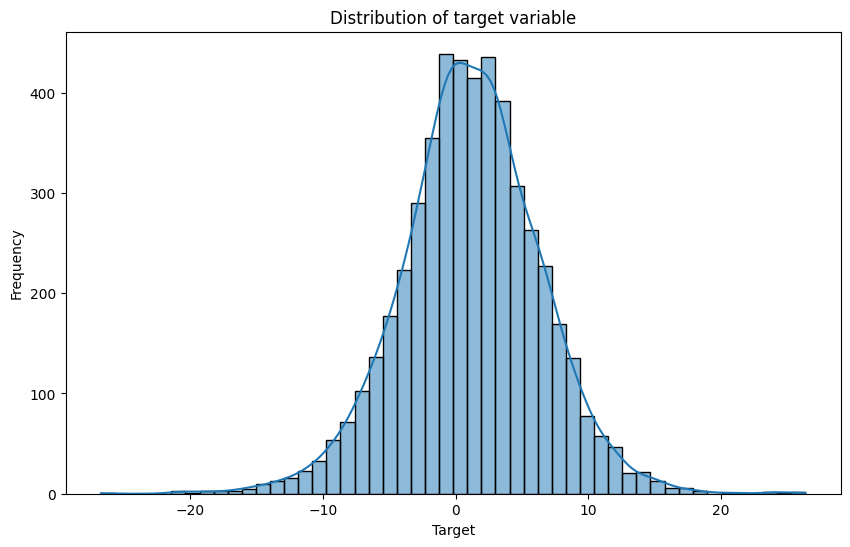

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train["target"], bins=50, kde=True)
plt.title("Distribution of target variable")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.show()

#### Encode categorical features

In [13]:
df_train[df_train["f_215"].isnull()]

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
11,2.148576,1.830,-0.037,-1.382,0.076,0.552,0.809,0.702,-0.060,-0.113,-0.699,1.208,-0.239,-0.748,-0.710,0.106,-0.553,0.091,0.412,-0.082,0.257,-2.842,-0.450,0.411,0.407,0.345,0.294,-1.719,1.197,NaN,-1.808,0.882,0.882,0.636,0.950,-0.746,-1.520,1.016,0.440,0.684,-0.635,1.854,1.754,1.327,-0.036,0.020,0.380,-0.400,-0.631,0.312,0.170,2.548,0.395,0.496,-0.215,-1.866,-1.061,NaN,0.152,0.391,1.527,1.941,d,-0.442,-0.051,-0.080,0.449,0.108,-0.241,0.817,-1.731,0.742,-0.480,-0.332,-0.077,-0.851,-0.146,1.210,0.875,1.800,-1.135,0.575,NaN,0.537,-0.172,-0.363,0.398,-0.925,-0.650,0.845,0.560,-0.746,-0.437,-0.092,0.862,0.910,1.059,-0.156,-0.905,-1.044,1.929,0.910,-0.691,1.066,-0.010,-0.116,1.815,2.480,1.591,-0.305,-0.871,0.039,0.602,-0.308,0.803,1.293,-1.258,-0.210,-0.376,1.698,1.959,1.535,A,1.803,0.362,-0.630,-0.425,-0.933,-0.154,0.244,-0.179,1.570,0.267,-0.245,1.187,0.119,0.418,0.061,-0.347,-0.239,-0.629,-1.319,2.028,-1.886,-0.058,0.588,-2.960,-0.784,0.608,-1.039,-1.438,-0.272,-0.605,-2.559,0.146,0.227,1.110,1.731,-1.058,-0.641,-0.175,-0.409,0.234,NaN,1.282,0.784,-0.829,-1.374,0.326,0.015,0.251,-1.093,-1.888,-0.016,-0.075,-0.121,-1.125,-0.758,-1.401,0.019,-0.258,-1.200,1.693,-0.168,0.270,-3.157,-2.593,1.522,0.093,0.129,-0.991,-1.525,-0.152,1.459,0.720,-1.273,-0.954,0.488,-0.445,-1.282,-0.415,2.088,-0.541,-0.562,1.699,0.222,-0.234,-1.208,-0.831,0.010,0.780,-0.567,0.303,1.365,1.264,-0.155,NaN,-1.045,-0.519,-0.957,-0.598,0.479,-0.741,0.715,0.545,-0.049,-0.223,-0.018,NaN,-0.573,-0.685,-1.071,-0.036,1.072,-1.146,-0.044,0.285,-0.082,Mexico,0.585,-0.261,-0.871,-1.094,0.041,-0.777,0.480,1.041,-0.722,-0.165,0.637,0.169,-1.811,0.685,0.495,-0.149
50,6.895417,-0.995,-0.363,0.207,1.570,1.199,1.058,0.083,-1.576,0.692,-0.389,0.861,0.882,-0.012,0.655,1.038,-0.102,-0.453,NaN,-0.112,0.750,-0.035,-1.535,0.104,-0.844,1.739,0.162,-0.052,0.920,-1.920,0.698,-0.148,-0.964,-0.622,-0.049,-0.412,0.102,-0.584,0.024,-1.049,0.096,0.795,NaN,-1.013,0.206,1.087,-0.051,0.419,0.137,0.196,0.361,1.288,1.942,-0.524,-0.013,0.884,-1.523,-2.323,-0.499,-2.067,-0.769,0.589,a,1.070,-2.349,0.462,0.355,1.012,-1.038,0.140,-0.995,0.370,-0.180,-0.157,0.892,0.798,0.289,-0.810,0.610,-0.528,0.447,0.782,1.849,-0.137,-0.742,-0.897,0.369,-1.440,0.377,-0.024,0.390,0.215,-0.984,0.463,0.909,0.413,1.061,0.004,0.801,-0.460,1.015,0.426,-1.446,0.213,1.711,0.957,2.506,0.840,-0.102,NaN,-0.958,0.452,-1.397,0.075,0.113,1.082,0.926,0.369,2.312,0.669,1.861,1.380,B,-0.441,1.909,-0.640,0.052,1.369,-2.208,0.435,0.782,-0.730,1.458,1.573,0.712,-0.429,1.125,0.231,0.848,0.512,1.585,2.553,0.905,-0.160,-0.368,0.137,-0.652,0.9

In [13]:
df_train

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,-0.129,-0.268,0.367,-0.033,2.359,-0.469,-0.214,0.896,1.245,1.852,1.438,0.454,0.051,-0.076,0.308,-1.439,0.560,0.167,-0.719,0.475,-1.586,-2.020,-0.497,-0.946,2.394,1.181,0.463,1.789,-0.173,0.545,0.228,-1.132,-0.421,1.456,-0.727,0.189,1.809,-0.180,-0.245,0.144,-1.125,-0.587,0.669,-0.976,-0.361,0.702,0.535,-0.189,0.438,-0.907,NaN,1.330,b,-0.037,-0.100,0.983,0.634,-0.914,-1.627,0.791,-1.158,0.221,0.493,-1.055,-0.491,0.172,0.098,-1.135,-0.941,0.368,-0.006,-0.919,-0.978,-0.468,0.248,-0.659,-1.612,-1.857,0.996,-0.323,1.296,0.982,0.459,-0.759,-0.116,0.734,-2.218,-1.701,0.247,0.890,0.089,1.709,0.115,0.996,0.770,0.182,-1.061,-0.966,0.596,NaN,1.645,2.074,-0.517,0.667,-1.007,-0.588,0.836,NaN,0.183,-0.202,0.409,1.171,D,1.019,-0.522,0.286,-0.431,0.730,0.861,1.834,-2.278,-0.626,NaN,-0.050,-1.372,-1.134,0.778,1.915,0.197,0.564,-0.518,-0.057,1.204,-1.306,-0.302,0.440,-0.572,-0.818,-0.731,-2.168,NaN,-0.895,0.428,-0.981,0.361,0.777,0.800,-2.109,-1.287,0.780,1.422,0.170,-0.371,-2.303,0.362,0.521,-0.761,1.642,-1.261,1.424,0.866,0.341,-0.877,NaN,-1.393,0.366,0.639,-1.657,0.468,0.120,0.228,1.920,-1.542,-0.178,0.748,0.243,0.988,-0.030,1.047,-1.062,0.585,-2.081,-1.119,-1.095,1.619,1.262,0.539,-0.782,-2.092,-1.359,-1.226,1.587,1.993,-0.028,-2.500,-2.004,-0.789,-0.171,-0.061,-0.164,1.681,0.478,1.421,-0.470,0.202,NaN,red,1.190,0.211,-0.081,0.256,-0.644,0.868,0.604,0.212,0.460,-0.942,0.525,0.836,0.973,-0.050,NaN,0.620,-0.781,-0.909,0.943,1.153,1.331,Canada,0.793,NaN,0.261,0.664,0.585,-0.384,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,-1.019,0.121,0.782,-0.323,-1.156,-1.198,1.091,-0.037,-1.550,-0.638,-1.080,-1.061,-0.804,0.001,NaN,-0.505,1.151,-0.155,1.482,-1.647,-0.776,1.337,0.237,-1.017,-0.688,2.026,0.670,-1.772,NaN,-1.542,-2.249,-0.086,-0.510,1.531,0.051,-0.002,-0.441,-0.378,0.901,0.267,0.193,0.327,0.391,-0.789,-0.230,0.235,2.268,0.044,0.769,-0.488,-1.586,0.566,a,-0.838,0.450,1.992,-1.696,2.276,0.234,1.058,1.169,0.080,0.265,0.841,-1.232,-1.675,0.423,-0.575,0.913,1.630,1.521,-0.346,-1.154,-1.340,0.788,0.697,-0.023,2.952,1.081,0.506,-0.421,-0.066,-0.984,0.945,1.600,-0.445,0.569,0.813,0.958,-0.742,0.331,0.881,-1.144,-0.036,-2.327,1.885,-0.955,-0.026,1.781,-0.312,-0.407,0.097,-1.521,-1.841,-0.435,1.250,0.340,-1.664,0.048,-0.309,1.472,1.385,A,-0.941,-0.692,-0.117,1.178,-0.988,-0.703,0.604,1.217,-0.712,0.601,0.364,-0.967,1.510,-1.512,0.088,-0.368,-1.181,-1.805,-1.596,-0.745,-0.934,0.779,0.532,1.812,-1.5

In [10]:
df_train.loc[:, ["target", "f_61", "f_121", "f_215", "f_237"]]

,target,f_61,f_121,f_215,f_237
0,3.066056,b,D,red,Canada
1,-1.910473,a,A,blue,Canada
2,7.830711,b,B,orange,Canada
3,-2.180862,a,C,blue,USA
4,5.462784,b,E,orange,Canada
...,...,...,...,...,...
4995,-1.371557,e,B,blue,Canada
4996,-3.120233,c,F,red,Canada
4997,0.013335,d,F,yellow,Mexico
4998,4.289620,d,C,blue,USA


In [11]:
# scikit-learn's OneHotEncoder to transform the categorical variables into one-hot encoded vectors
encoder = OneHotEncoder(handle_unknown="infrequent_if_exist", drop="first", sparse_output=False).set_output(transform="pandas")
encoder.fit(df_train.loc[:, ["f_215", "f_237"]])

OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist',
              sparse_output=False)

In [12]:
transformed_nominal = encoder.transform(df_train.loc[:, ["f_215", "f_237"]])

In [14]:
df_train = pd.concat(
    [df_train.drop(columns=["f_215", "f_237"]), transformed_nominal],
    axis=1,
)

In [92]:
# f_215 and f_237 have nominal categorical values - use one-hot encoding using pandas get_dummies method
df_train = pd.get_dummies(df_train, columns=["f_215", "f_237"], drop_first=True, dtype="int")

In [15]:
df_train

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_251,f_252,f_253,f_215_orange,f_215_red,f_215_yellow,f_215_nan,f_237_Mexico,f_237_USA,f_237_nan
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,...,-0.418,-1.244,-0.503,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,-0.850,0.821,-0.260,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,1.332,-1.147,2.580,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.613,1.033,0.400,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,-0.754,-0.025,-0.931,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.371557,-0.297,-0.715,2.349,1.098,1.162,0.953,1.321,0.344,0.861,...,-0.967,1.136,-0.510,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,-3.120233,0.391,0.581,1.532,2.415,1.563,-1.156,1.369,0.263,0.766,...,0.267,0.872,-1.428,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4997,0.013335,-0.802,0.720,0.345,-0.440,-1.054,0.092,-0.481,0.790,-0.028,...,0.099,0.774,1.045,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4998,4.289620,0.195,-1.554,-0.203,0.965,-0.794,0.654,-1.008,-1.291,-2.035,...,0.032,-1.740,-1.816,0.0,0.0,0.0,0.0,0.0,1.0,0.0
